In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
!pip install matplotlib numpy

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


# 奇异值分解

对于 $mxn$ 的实数矩阵$A$， 我们想把它分解为如下的形式：
$$
A=UDV^T \tag{1}
$$
其中 $U$ 和 $V$ 均为单位正交阵，即有 $UU^T=I$ 和 $VV^T=I$,$U$ 称为 <font color=#FF0000 >左奇异矩阵</font>
，$V$ 称为 <font color=#FF0000>右奇异矩阵</font>，$D$ 仅在主对角线上有值，我们称之为 <font color=#FF0000>奇异值</font>，其他元素均为0。上面的矩阵维度分别为： $U \in R^{m \times n}$ , $D \in R^{n \times n}$ ,$V \in R^{n \times n}$

在求解上面的 $U,D,V$ 时，可以利用如下性质：
$$
AA^T = UDV^TVD^TU^T = UDD^TU^T      \tag{2}   
$$
$$
A^TA = VD^TU^TUDV^T = VD^TDV^T      \tag{3}
$$

对公式（2）和（3）做特征分解，即可得到奇异值分解的结果。但分开求存在一定的问题，由于做特征值分解的时候，特征向量的正负号并不影响结果，如
对（2）和（3）做特征分解：
$$
AA^T \mu_i=\sigma_i\mu_i \space or \space AA^T(−\mu_i)=\sigma_i(−\mu_i) \tag{4}
$$
$$
A^TA \nu_i=\sigma_i \nu_i \space or \space A^TA(−\nu_i)=\sigma_i(−\nu_i) \tag{5}
$$
如果在计算过程取，取上面的 $\mu_i$ 组成左奇异矩阵 $U$，取 $−\nu_i$ 组成右奇异矩阵 $V$，此时$A \ne UDV^T$。因此求$\nu_i$时，要根据$\mu_i$来求，这样才能保证$A=UDV^T$。因此，我们可以得出如下计算SVD的算法。它主要是先做特性值分解，再根据特征值分解得到的左奇异矩阵U,间接地求出部分的右奇异矩阵$V'\in R^{m \times n}$`。

---
算法: SVD

---
输入： 样本数据
输出： 左奇异矩阵，奇异值矩阵，右奇异矩阵

---

1. 计算特征值：特征值分解 $AA^T$,其中 $A \in R^{m \times n}$ 为原始样本数据
$$
AA^T =  UDD^TU^T 
$$
得到左奇异矩阵$U \in R^{mxm}$ 和 奇异值矩阵$D'\in R^{m \times m}$

2. 间接求部分右奇异矩阵： 求$V′\in R^{m \times n}$
利用$A=UD'V'$可得
$$
V'=(UD')^{-1}A=(D')^{-1}U^TA
$$
3. 返回$U, D', V'$，分别为左奇异矩阵，奇异值矩阵，右奇异矩阵。

注意：这里得到的$D'$和$V'$与式（3）所得到的$D, V$有区别，它们的维度不一样。$D'$是只取了前𝑚个奇异值形成的对角方阵，即$D'\in R^{m\times m}$；$V'$不是一个方阵，它只取了$V \in R^{m \times n}的前m行（假设m<n），即有$V'=V(:m,⋅)$。这样一来，我们同样有类似式（1）的数学关系成立，即

$$
A=UD'(V')^T \tag{6}
$$

我们可以利用此关系重建原始数据。

## SVD 实现


测试矩阵的生成：

In [2]:
import numpy as np
test=np.random.rand(4,3)
test

array([[0.79233216, 0.53341027, 0.9978573 ],
       [0.39494846, 0.256215  , 0.60760927],
       [0.44584846, 0.26867615, 0.61837992],
       [0.717213  , 0.58041873, 0.74805391]])

特征值分解：

In [3]:
# 计算特征值和特征向量
eval_sigma1,evec_u = np.linalg.eigh(test.dot(test.T))
eval_sigma1
evec_u

array([-5.17834286e-16,  5.94508960e-04,  3.52472582e-02,  4.52724013e+00])

array([[-0.61155509,  0.4272757 ,  0.14891513, -0.64904556],
       [-0.0541349 , -0.79283532,  0.48982536, -0.35854245],
       [ 0.75278394,  0.36466019,  0.39656438, -0.37825385],
       [ 0.23745762, -0.2363696 , -0.76199219, -0.55417615]])

计算右奇异矩阵


In [4]:
#降序排列后，逆序输出
eva1_sort_idx = np.argsort(eval_sigma1)[::-1]
eva1_sort_idx


array([3, 2, 1, 0])

In [5]:
# 将特征值对应的特征向量也对应排好序
eval_sigma1 = np.sort(eval_sigma1)[::-1]
evec_u = evec_u[:,eva1_sort_idx]



In [6]:
# 计算奇异值矩阵的逆
eval_sigma1 = np.sqrt(eval_sigma1)
eval_sigma1_inv = np.linalg.inv(np.diag(eval_sigma1))
eval_sigma1


//anaconda3/envs/vj/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


array([2.12773122, 0.18774253, 0.02438255,        nan])

In [7]:
# 计算右奇异矩阵
evec_part_v = eval_sigma1_inv.dot((evec_u.T).dot(test))
evec_part_v

array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]])

上面的计算出的evec_u, eval_sigma1, evec_part_v分别为左奇异矩阵，所有奇异值，右奇异矩阵。



## SVD降维后重建数据
取不同个数的奇异值，重建数据，计算出均方误差，随着奇异值个数的增加，均方误差（MSE）在减小，且奇异值和的比率正快速上升。

## 在图像压缩中的应用


1. 读图片

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

imageurl="https://i.loli.net/2019/08/21/TwXSnfU1F8Btle4.png"
img_eg = mpimg.imread(imageurl)
print(img_eg.shape)

(908, 1228, 4)


2. 奇异值分解

In [9]:
img_temp = img_eg.reshape(img_eg.shape[0],  img_eg.shape[1]*img_eg.shape[2] )
U,Sigma,VT = np.linalg.svd(img_temp)
U
Sigma
VT

array([[-0.0373367 , -0.04767018, -0.00619372, ...,  0.00679257,
         0.03061514, -0.04049086],
       [-0.03729457, -0.04764504, -0.00645326, ..., -0.06662189,
        -0.08768112,  0.16038156],
       [-0.03725736, -0.04758124, -0.00632676, ...,  0.13883032,
         0.09310972, -0.25282285],
       ...,
       [-0.02920706,  0.0601773 , -0.00867395, ..., -0.0305791 ,
        -0.02572552,  0.00363501],
       [-0.02918983,  0.05983966, -0.00878807, ...,  0.01919843,
         0.01200839, -0.00162779],
       [-0.02911212,  0.06018983, -0.00914283, ..., -0.01192909,
         0.00441234,  0.00376834]], dtype=float32)

array([1.27511218e+03, 1.73499481e+02, 1.34513000e+02, 1.12726891e+02,
       9.41068344e+01, 7.10079346e+01, 6.39096107e+01, 5.56682549e+01,
       5.11073265e+01, 5.00776291e+01, 4.88207207e+01, 4.17404175e+01,
       3.54276543e+01, 3.42559052e+01, 3.32177696e+01, 3.14329281e+01,
       2.98854637e+01, 2.78883114e+01, 2.75427208e+01, 2.66241169e+01,
       2.58815651e+01, 2.45279865e+01, 2.33776474e+01, 2.25665970e+01,
       2.23465958e+01, 2.18062477e+01, 2.05924892e+01, 2.03522911e+01,
       2.00775909e+01, 1.97472458e+01, 1.85653725e+01, 1.80224495e+01,
       1.76899395e+01, 1.74992733e+01, 1.66313114e+01, 1.65708160e+01,
       1.63539505e+01, 1.58819036e+01, 1.57468348e+01, 1.56094294e+01,
       1.50782270e+01, 1.49106722e+01, 1.48039093e+01, 1.44583473e+01,
       1.40857363e+01, 1.38732662e+01, 1.36178074e+01, 1.33694582e+01,
       1.33389435e+01, 1.30323982e+01, 1.28765221e+01, 1.27765112e+01,
       1.25512342e+01, 1.23854208e+01, 1.23142557e+01, 1.21819725e+01,
      

array([[-1.2995885e-02, -1.4500481e-02, -1.1651706e-02, ...,
        -1.2407016e-02, -9.7161606e-03, -2.3600185e-02],
       [ 1.2466079e-03,  4.3181446e-03, -1.1471053e-04, ...,
         5.9317700e-03,  2.6452623e-03,  8.0331191e-03],
       [-2.8211923e-04,  1.3504031e-03, -9.5625105e-04, ...,
        -2.0261973e-03, -3.0664350e-03, -2.7950481e-03],
       ...,
       [-1.3451053e-02,  6.2455875e-03, -7.0850891e-03, ...,
         9.3001509e-01, -5.8916599e-02, -1.4906033e-04],
       [-2.5937909e-03,  3.1265831e-03,  3.0761170e-03, ...,
        -5.9387643e-02,  9.2818195e-01, -1.2296857e-04],
       [-1.6302904e-02,  9.8963163e-04,  7.5009803e-04, ...,
         7.0960079e-05, -5.9025184e-05,  9.9929571e-01]], dtype=float32)

我们先将图片变成二维，再做奇异值分解。从svd函数中得到的奇异值sigma它是从大到小排列的。

3. 取前部分奇异值重构图片

In [10]:
# 取前60个奇异值
sval_nums = 60
img_restruct1 = (U[:,0:sval_nums]).dot(np.diag(Sigma[0:sval_nums])).dot(VT[0:sval_nums,:])
img_restruct1 = img_restruct1.reshape(img_eg.shape[0],img_eg.shape[1],img_eg.shape[2])

# 取前120个奇异值
sval_nums = 120
img_restruct2 = (U[:,0:sval_nums]).dot(np.diag(Sigma[0:sval_nums])).dot(VT[0:sval_nums,:])
img_restruct2 = img_restruct2.reshape(img_eg.shape[0],img_eg.shape[1],img_eg.shape[2])

将图片显示出来看一下，对比下效果



[Text(0.5, 1.0, 'src')]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[Text(0.5, 1.0, 'nums of sigma = 60')]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[Text(0.5, 1.0, 'nums of sigma = 120')]

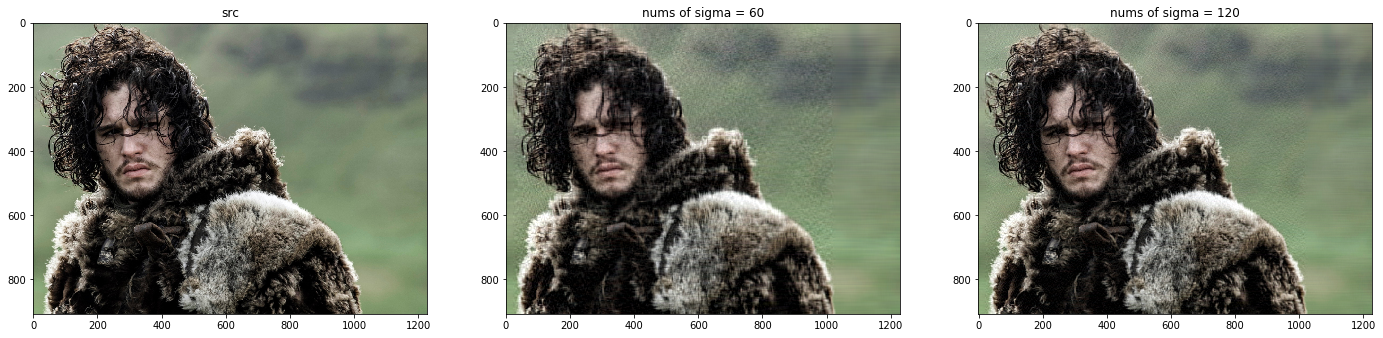

In [11]:
fig, ax = plt.subplots(1,3,figsize = (24,32))

ax[0].imshow(img_eg)
ax[0].set(title = "src")
ax[1].imshow(img_restruct1)
ax[1].set(title = "nums of sigma = 60")
ax[2].imshow(img_restruct2)
ax[2].set(title = "nums of sigma = 120")

可以看到，当我们取到前面120个奇异值来重构图片时，基本上已经看不出与原图片有多大的差别。



# 总结
从上面的图片的压缩结果中可以看出来，奇异值可以被看作成一个矩阵的代表值，或者说，奇异值能够代表这个矩阵的信息。当奇异值越大时，它代表的信息越多。因此，我们取前面若干个最大的奇异值，就可以基本上还原出数据本身。
